In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset into pandas dataframe
data_train = pd.read_csv("train.csv")
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data_train.shape

(14999, 9)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
# Identifying the missing values

In [ ]:
(data_train.comment=='F').sum()

233

In [ ]:
data_train[data_train.views=='F']

,vidid,adview,views,likes,dislikes,comment,published,duration,category
7447,VID_9269,1,F,0,1,0,2013-10-03,PT21M28S,D
8112,VID_9262,1,F,1,0,0,2013-09-18,PT21M6S,D


In [ ]:
data_train[data_train.likes=='F']

,vidid,adview,views,likes,dislikes,comment,published,duration,category
155,VID_20934,8,127347,F,F,4,2017-02-28,PT54M19S,G
188,VID_23045,1,881444,F,F,37,2015-05-11,PT6M55S,H
232,VID_13733,1,6370,F,F,0,2016-10-25,PT3M21S,D
262,VID_23241,1,111503,F,F,19,2015-01-10,PT25M32S,H
580,VID_9127,1,2276106,F,F,2,2015-05-12,PT1M29S,D
...,...,...,...,...,...,...,...,...,...
14783,VID_9130,1,20237,F,F,0,2015-05-17,PT4M10S,D
14797,VID_13594,551,3261,F,F,1,2016-04-27,PT21S,D
14956,VID_20929,58,300933,F,F,12,2017-01-13,PT20M6S,G
14963,VID_9128,1,1519,F,F,0,2015-03-10,PT4M52S,D


In [ ]:
data_train[data_train.dislikes=='F']

,vidid,adview,views,likes,dislikes,comment,published,duration,category
155,VID_20934,8,127347,F,F,4,2017-02-28,PT54M19S,G
188,VID_23045,1,881444,F,F,37,2015-05-11,PT6M55S,H
232,VID_13733,1,6370,F,F,0,2016-10-25,PT3M21S,D
262,VID_23241,1,111503,F,F,19,2015-01-10,PT25M32S,H
580,VID_9127,1,2276106,F,F,2,2015-05-12,PT1M29S,D
...,...,...,...,...,...,...,...,...,...
14783,VID_9130,1,20237,F,F,0,2015-05-17,PT4M10S,D
14797,VID_13594,551,3261,F,F,1,2016-04-27,PT21S,D
14956,VID_20929,58,300933,F,F,12,2017-01-13,PT20M6S,G
14963,VID_9128,1,1519,F,F,0,2015-03-10,PT4M52S,D


In [ ]:
data_train[data_train.comment=='F']

,vidid,adview,views,likes,dislikes,comment,published,duration,category
104,VID_10539,14,921464,430,343,F,2016-08-06,PT1M46S,D
116,VID_2480,2,678578,267,112,F,2014-08-17,PT7M47S,C
126,VID_2049,1,10328,79,14,F,2014-04-18,PT4M21S,B
216,VID_7201,22,1245266,821,340,F,2016-08-17,PT1M25S,D
247,VID_9240,1,115598,90,39,F,2017-02-22,PT1M59S,D
...,...,...,...,...,...,...,...,...,...
14892,VID_175,31,334361,489,356,F,2013-03-12,PT8M44S,A
14938,VID_9233,1,931533,2637,1684,F,2017-02-03,PT1M51S,D
14977,VID_13740,4,10716,F,F,F,2016-09-30,PT2M18S,D
14990,VID_11386,15,525829,350,222,F,2016-07-08,PT29M38S,D


In [ ]:
data_train.replace(to_replace='F',value=np.NaN,inplace=True)

In [ ]:
# Treating missing values
data_train.dropna(inplace=True)

In [ ]:
# Formatting the data
data_train['views']=data_train['views'].astype('float')
data_train['likes']=data_train['likes'].astype('float')
data_train['dislikes']=data_train['dislikes'].astype('float')
data_train['comment']=data_train['comment'].astype('float')
data_train['published']=pd.to_datetime(data_train['published'])

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13758 entries, 1 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   vidid      13758 non-null  object        
 1   adview     13758 non-null  int64         
 2   views      13758 non-null  float64       
 3   likes      13758 non-null  float64       
 4   dislikes   13758 non-null  float64       
 5   comment    13758 non-null  float64       
 6   published  13758 non-null  datetime64[ns]
 7   duration   13758 non-null  object        
 8   category   13758 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
# Exploring the data further

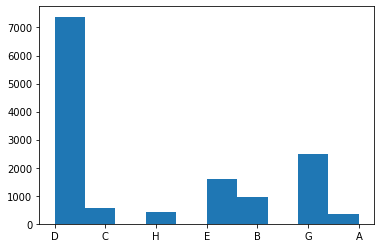

In [ ]:
plt.hist(data_train["category"])
plt.show()

In [ ]:
# plt.figure(figsize=(15,4))
# plt.hist(data_train["duration"])
# plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


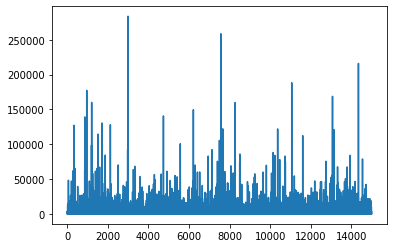

In [ ]:
plt.plot(data_train["likes"])
plt.show()

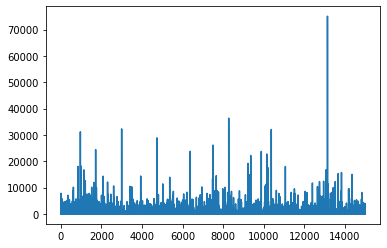

In [ ]:
plt.plot(data_train["comment"])
plt.show()

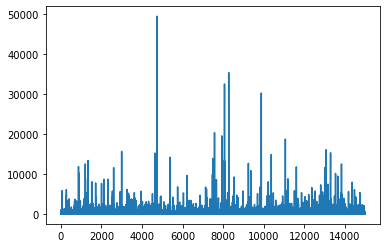

In [ ]:
plt.plot(data_train["dislikes"])
plt.show()

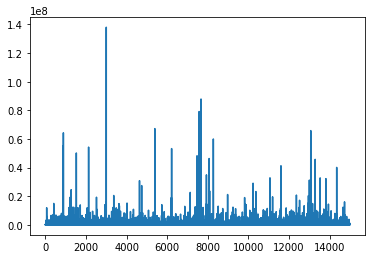

In [ ]:
plt.plot(data_train["views"])
plt.show()

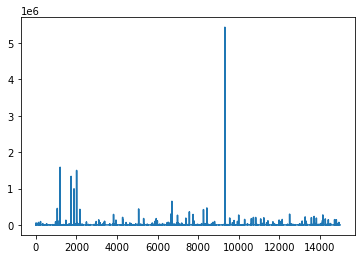

In [ ]:
plt.plot(data_train["adview"])
plt.show()

In [ ]:
# Treating Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


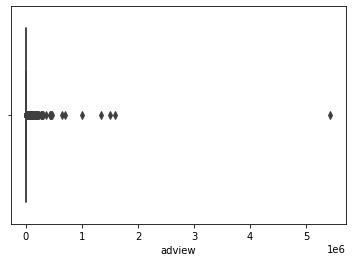

In [ ]:
sns.boxplot(data_train["adview"])
plt.show()

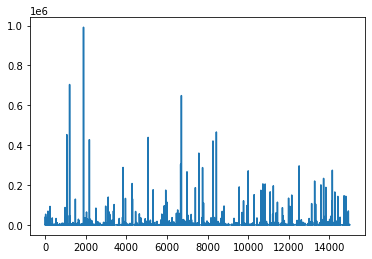

In [ ]:
# Remove videos with adview greater than 1000000 as outlier
data_train = data_train[data_train["adview"] <1000000]
plt.plot(data_train["adview"])
plt.show()

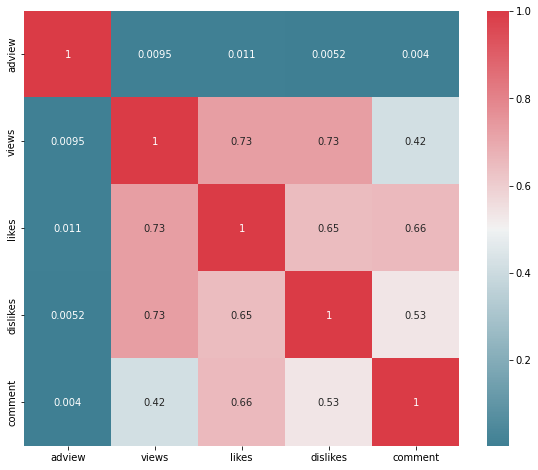

In [ ]:
# Checking for correlation
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

In [ ]:
# views variable has high correlation with likes and dislikes
data_train.likes=data_train.likes/data_train.views
data_train.dislikes=data_train.dislikes/data_train.views
data_train=data_train.drop(['views'],axis=1)

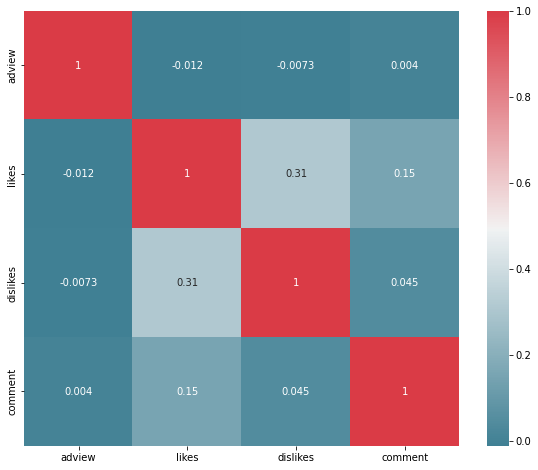

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

In [ ]:
# Encoding Categorical Variables
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()


,vidid,adview,likes,dislikes,comment,published,duration,category
1,VID_14135,2,0.032806,0.001172,6.0,2016-10-01,PT9M30S,4
2,VID_2187,1,0.012358,0.000000,2.0,2016-07-02,PT2M16S,3
3,VID_23096,6,0.001251,0.000259,153.0,2016-07-27,PT4M22S,8
4,VID_10175,1,0.001502,0.000000,0.0,2016-06-29,PT31S,4
5,VID_10756,4,0.000000,0.000000,0.0,2016-05-09,PT15S,4


In [ ]:
column_vidid=data_train['vidid']
# Encoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,likes,dislikes,comment,published,duration,category
1,2739,2,0.032806,0.001172,6.0,2168,3010,4
2,7256,1,0.012358,0.000000,2.0,2077,1844,3
3,8122,6,0.001251,0.000259,153.0,2102,2521,8
4,122,1,0.001502,0.000000,0.0,2074,1943,4
5,517,4,0.000000,0.000000,0.0,2023,369,4


In [ ]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.29819155370497563

In [ ]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 2458.3390876188414
Mean Squared Error: 132619682.98535436
Root Mean Squared Error: 11516.061956474286


In [ ]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 903.0657168084966
Mean Squared Error: 133464274.13557392
Root Mean Squared Error: 11552.673895491638


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 1486.3446019629225
Mean Squared Error: 190205132.8949473
Root Mean Squared Error: 13791.487696943623


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 1840.6678589465057
Mean Squared Error: 105549622.21712355
Root Mean Squared Error: 10273.734579846005


In [ ]:
# Artificial Neural Network
import tensorflow as tf
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation="relu",input_shape=X_train.shape[1:]),Dense(6,activation="relu"),Dense(1)])
optimizer=tf.keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])


In [ ]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
344/344 [==============================] - 1s 1ms/step - loss: 394074592.0000 - mean_squared_error: 394074592.0000
Epoch 2/100
344/344 [==============================] - 1s 2ms/step - loss: 394056768.0000 - mean_squared_error: 394056768.0000
Epoch 3/100
344/344 [==============================] - 1s 1ms/step - loss: 393989664.0000 - mean_squared_error: 393989664.0000
Epoch 4/100
344/344 [==============================] - 1s 2ms/step - loss: 393855456.0000 - mean_squared_error: 393855456.0000
Epoch 5/100
344/344 [==============================] - 1s 2ms/step - loss: 393666688.0000 - mean_squared_error: 393666688.0000
Epoch 6/100
344/344 [==============================] - 1s 2ms/step - loss: 393437824.0000 - mean_squared_error: 393437824.0000
Epoch 7/100
344/344 [==============================] - 1s 2ms/step - loss: 393182784.0000 - mean_squared_error: 393182784.0000
Epoch 8/100
344/344 [==============================] - 1s 2ms/step - loss: 392917376.0000 - mean_squared_error:

In [ ]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

TESTING DATA

In [ ]:
data_test = pd.read_csv("test.csv")
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
data_test.shape

(8764, 8)

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8764 non-null   object
 1   views      8764 non-null   object
 2   likes      8764 non-null   object
 3   dislikes   8764 non-null   object
 4   comment    8764 non-null   object
 5   published  8764 non-null   object
 6   duration   8764 non-null   object
 7   category   8764 non-null   object
dtypes: object(8)
memory usage: 547.9+ KB


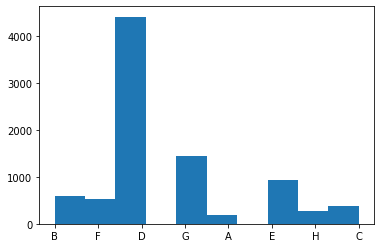

In [ ]:
plt.hist(data_test["category"])
plt.show()

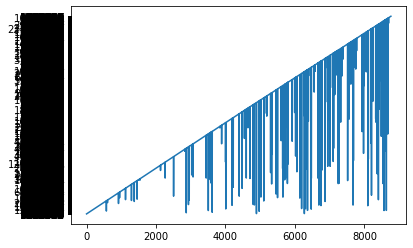

In [ ]:
plt.plot(data_test["views"])
plt.show()

In [ ]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [ ]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [ ]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [ ]:
data_test.likes=data_test.likes/data_test.views
data_test.dislikes=data_test.dislikes/data_test.views
data_test=data_test.drop(['views'],axis=1)
data_test.head()

,vidid,likes,dislikes,comment,published,duration,category
0,231,0.013977,0.000495,1377,2053,2115,2
1,3444,0.007856,0.000327,1047,1825,2055,6
2,1593,0.001086,0.000386,1,1009,1506,4
3,3775,0.001735,0.000190,274,116,2265,7
4,7644,0.001331,0.000119,116,1892,1625,2


In [ ]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,likes,dislikes,comment,published,duration,category
0,0.013977,0.000495,1377,2053,2115,2
1,0.007856,0.000327,1047,1825,2055,6
2,0.001086,0.000386,1,1009,1506,4
3,0.001735,0.000190,274,116,2265,7
4,0.001331,0.000119,116,1892,1625,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [ ]:
# from keras.models import load_model
# model = load_model("/content/ann_youtubeadview.h5")

In [ ]:
prediction = linear_regression.predict(X_test)

In [ ]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB


In [ ]:
prediction = prediction.rename(columns={0: "Adview"})

In [ ]:
prediction.head()

,Adview
0,3422.227729
1,3053.117340
2,993.070896
3,-1115.182267
4,3579.130675


In [ ]:
prediction.to_csv('predictions.csv')